In [5]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/emotion_from_sound_AI_project/cleaned_data/cleaned_IAD_full_features.csv')  # contains many features including arousal

import joblib
selected_features = joblib.load('/content/drive/MyDrive/emotion_from_sound_AI_project/features/top10_IAD_arousal_features.pkl')


ExactExplainer explainer: 928it [02:37,  5.66it/s]


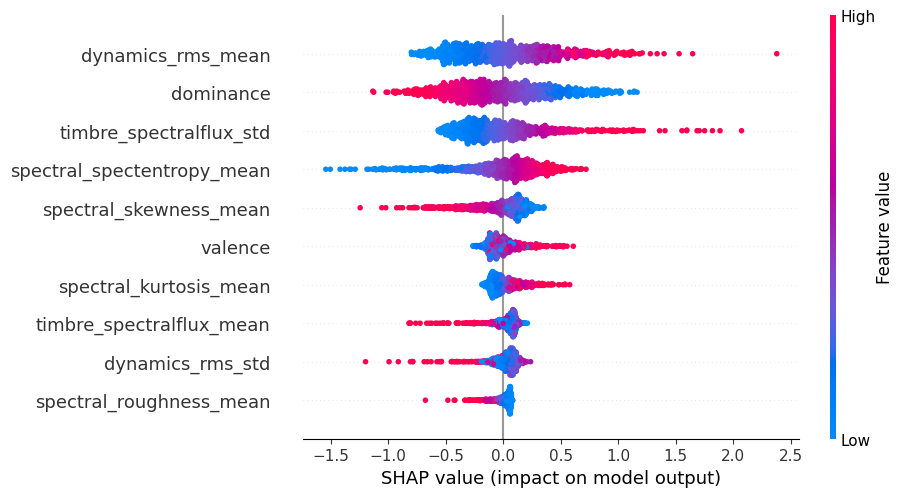

In [9]:
import shap
import joblib

# Load full pipeline
mlp_model = joblib.load('/content/drive/MyDrive/emotion_from_sound_AI_project/models/baseline_mlp_pipeline.pkl')

# Select features used in training
X_explain = df[selected_features]  # unscaled features (original input)

# Initialize JS (for notebook)
shap.initjs()

# Use model.predict as the explainer target
explainer = shap.Explainer(mlp_model.predict, X_explain)

# Compute SHAP values
shap_values = explainer(X_explain)

# Summary plot
shap.plots.beeswarm(shap_values)


In [10]:
import numpy as np

shap_importance = np.abs(shap_values.values).mean(axis=0)
top_indices = np.argsort(shap_importance)[::-1]  # sort descending order

# top 3 features
top_3_features = [selected_features[i] for i in top_indices[:3]]
print("Top 3 important features:", top_3_features)

Top 3 important features: ['dynamics_rms_mean', 'dominance', 'timbre_spectralflux_std']


# Analysis
Y-axis feature importance
X-axis impact on model output
a feature can have high importance but negative to model output - "dominance"
一个feature对model有力的推动或者压制 它就是重要的

SHAP ranks feature importance based on the magnitude of their contribution to model predictions, regardless of direction.
Therefore, a feature that consistently lowers predictions (negative SHAP) can still be ranked highly if it has a strong influence.

The feature dominance consistently contributes negatively to arousal prediction, suggesting an inverse relationship learned by the model.
Its high SHAP importance indicates that the model relies on this feature to adjust predictions appropriately, especially for samples with elevated dominance values.
Therefore, despite its negative influence, dominance is a valuable and informative feature.